Inicialização

In [ ]:
import random
import math
import numpy as np
from collections import deque
#import matplotlib
#import matplotlib.pyplot as plt
import signal
import pickle
import glob
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D  

#import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.offline.init_notebook_mode(connected=True)

In [15]:
def normalize(list, range): # range should be (lower_bound, upper_bound)
    l = np.array(list) 
    a = np.max(l)
    c = np.min(l)
    b = range[1]
    d = range[0]

    m = (b - d) / (a - c)
    pslope = (m * (l - c)) + d
    return pslope

def calcAvgOfX(scores, avgx):
    y1 = []

    for pos in range(0, len(scores), avgx):
        y1.append(np.average(scores[pos:pos+avgx]))

    return y1

def calcAvgOfXMinMax(scores, avgx):
    y1 = []
    min_ = []
    max_ = []

    for pos in range(0, len(scores), avgx):
        y1.append(np.average(scores[pos:pos+avgx]))
        min_.append(np.amin(scores[pos:pos+avgx]))
        max_.append(np.amax(scores[pos:pos+avgx]))

    return [y1,min_,max_]

def countPosNeg(y1):
    negatives = sum(n < 0 for n in y1)
    positives = sum(n > 0 for n in y1)
    zeroes = sum(n == 0 for n in y1)
    return [negatives, zeroes, positives]

def countWeightedPosNeg(y1):
    negatives = sum(n if (n <  0) else 0 for n in y1)
    positives = sum(n if (n >  0) else 0 for n in y1)
    zeroes =    sum(n if (n == 0) else 0 for n in y1)
    return [negatives, zeroes, positives]

def loadFiles(loadgroups):
    files = glob.glob("*.pickle")
    files = [x.replace(".pickle", "") for x in files]
    unpacked = []
    for x in files:
        for acp in loadgroups:
            if x.endswith(acp):
                with open(x+".pickle", 'rb') as handle:
                    unpacked.append([x,pickle.load(handle)[0:]])
                break
    return unpacked

In [125]:
groups = {  'testForgetting2' : 'blue'
            }
loadedfile = loadFiles(groups)
columnsofdt = ['SCORE', 'MAX SCORE', 'AVG SCORE', 'AVG MAX SCORE', 'EPISODE']

processed = {}

def getLabelName(inp, dictx):
    for x in dictx:
        if inp.endswith(x):
            return x
    return None



for runtst in loadedfile:
    posIn = getLabelName(runtst[0], groups)
    if posIn in processed:
        processed[posIn] = np.average([processed[posIn], runtst[1]], axis=0)
    else:
        processed[posIn] = runtst[1]



        
count = 0


forgetting1 = 3620
forgetting2 = 6570

In [128]:
def calcAvgOfXWStrides(scores, avgx, strides):
    y1 = []

    for pos in range(0, len(scores), strides):
        y1.append(np.average(scores[pos:pos+avgx]))

    return y1



def addToPlotAvgOfXWStrides(scores, avg, labelx, col, strides, posx=1, maxpos=1, padding=0.3, title=""):
    y1 = calcAvgOfXWStrides(scores, avg, strides)
    y2 = calcAvgOfXWStrides(scores, 100, 1)
    
    
    x = np.array([i for i in range(0, len(y1))])
    pospad = (1/maxpos)-padding/maxpos
    posit = (x-pospad)+(posx*pospad)

    blueshift = [0 for x in range(0,forgetting1)]
    blueshift.extend([150 for x in range(forgetting1,forgetting2)])
    blueshift.extend([255 for x in range(forgetting2,len(y1))])

    
    diffd = np.subtract(y1,y2)

    ptp = np.ptp(diffd).astype(int)
    internal = (diffd - np.min(diffd))
    l_norm =  255*np.divide(internal,ptp)


    colors = ["rgba(10, "+str(abs(l_norm[x]))+", "+str(blueshift[x])+", 1)" if y1[x] > y2[x] else "rgba(10, 10, "+str(blueshift[x])+", 1)" if y1[x] == y2[x] else "rgba("+str(abs(l_norm[x]))+", 10, "+str(blueshift[x])+", 1)"  for x in range(0,len(y1))]

    trace1 = go.Scattergl(
        x=posit,
        y=y1,
        mode='markers',
        marker=dict(
            size=6, 
            color=colors,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=pospad
            ),
            opacity=0.8
        ),
        name=title
    )
    data = [trace1]
    layout = go.Layout(
        title=go.layout.Title(
        text=title+' - Average of ' + str(avg),
        xref='paper',
        x=0
        ),
        scene = dict(
            
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",
                         title='Scores'),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",
                        title='Difference'),)
                    
                  
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename=title+' CAVGoF'+str(avg)+'-'+str(random.randint(1,50000)))

    
def plotAndSaveContinuousAverageOf(customTitle,title,averageOf = 1,blim=None, ulim=None,customLabel = None, posx = 1, maxn = 1):
    for runtst in processed:
        dtframe = processed[runtst]
        label = runtst
        if customLabel is not None:
            label=customLabel
        color = groups[runtst]

        print("Processing: " + label)
        dataframe = pd.DataFrame(data=dtframe, columns=columnsofdt)
        scores = dataframe['SCORE']
        
        addToPlotAvgOfXWStrides(scores, averageOf, label, color, 1, title=title)
    print("Done")
    
blim = None
ulim = None
title = 'Assault - Atari'
ctitle = 'Forgetting'   




Processing: Forgetting


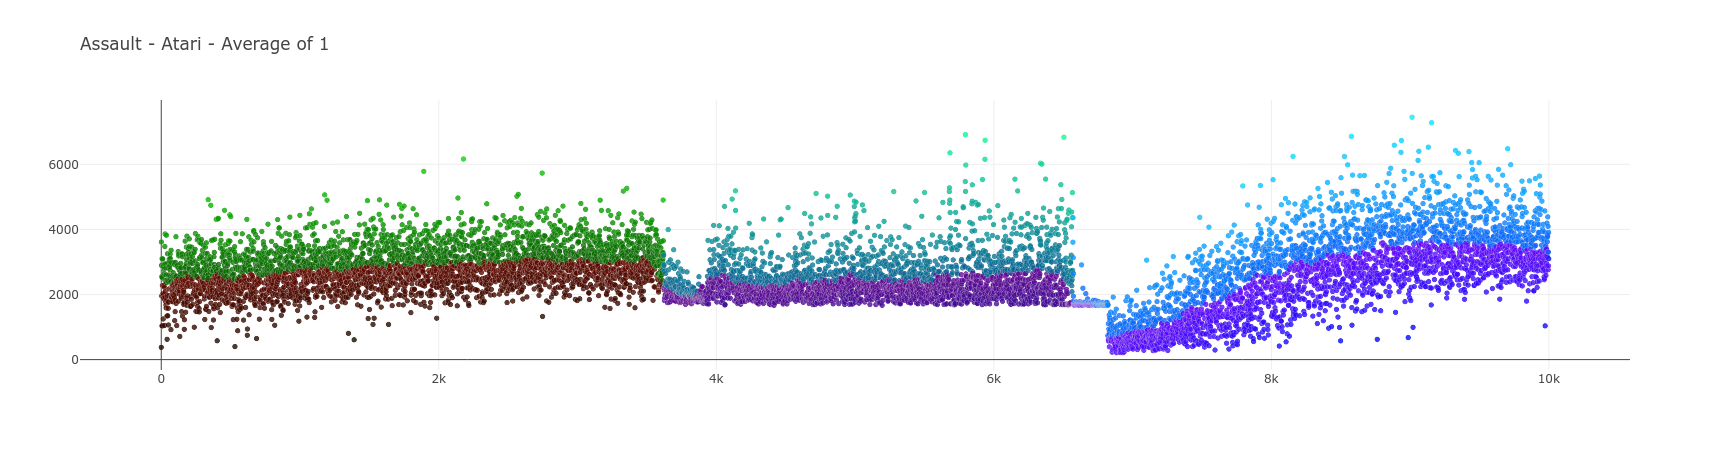

Done


In [129]:
plotAndSaveContinuousAverageOf(ctitle,title,1,blim,ulim,ctitle)

Processing: Forgetting


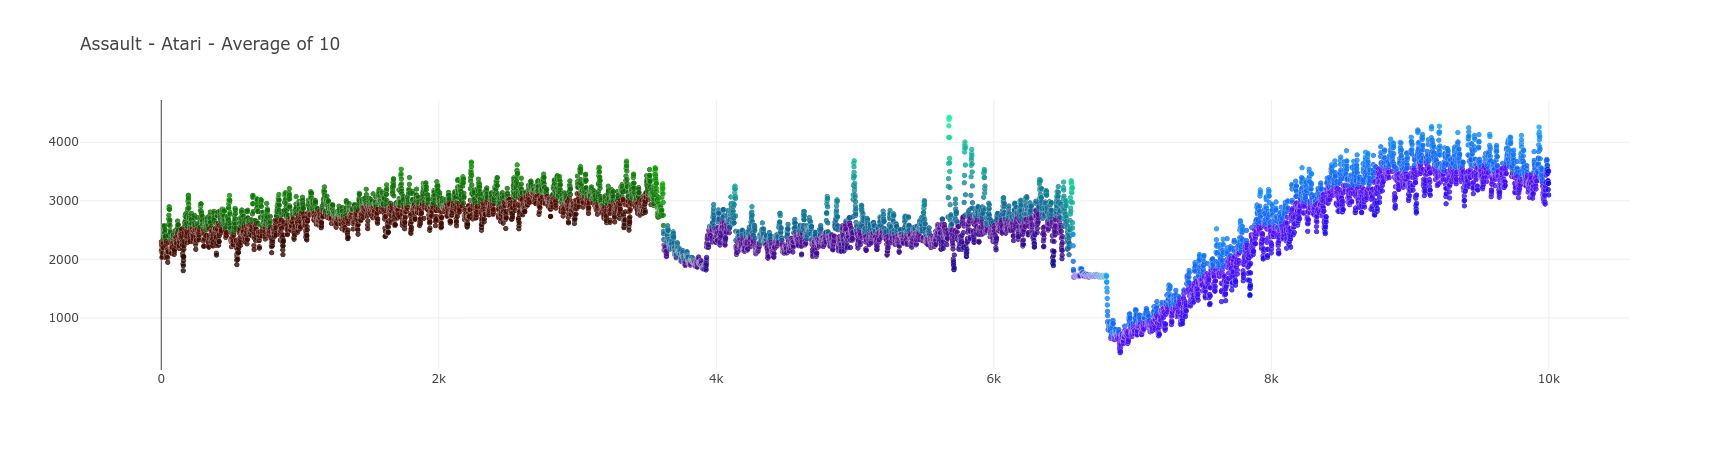

Done


In [130]:
plotAndSaveContinuousAverageOf(ctitle,title,10,blim,ulim,ctitle)


Processing: Forgetting


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning:

invalid value encountered in true_divide



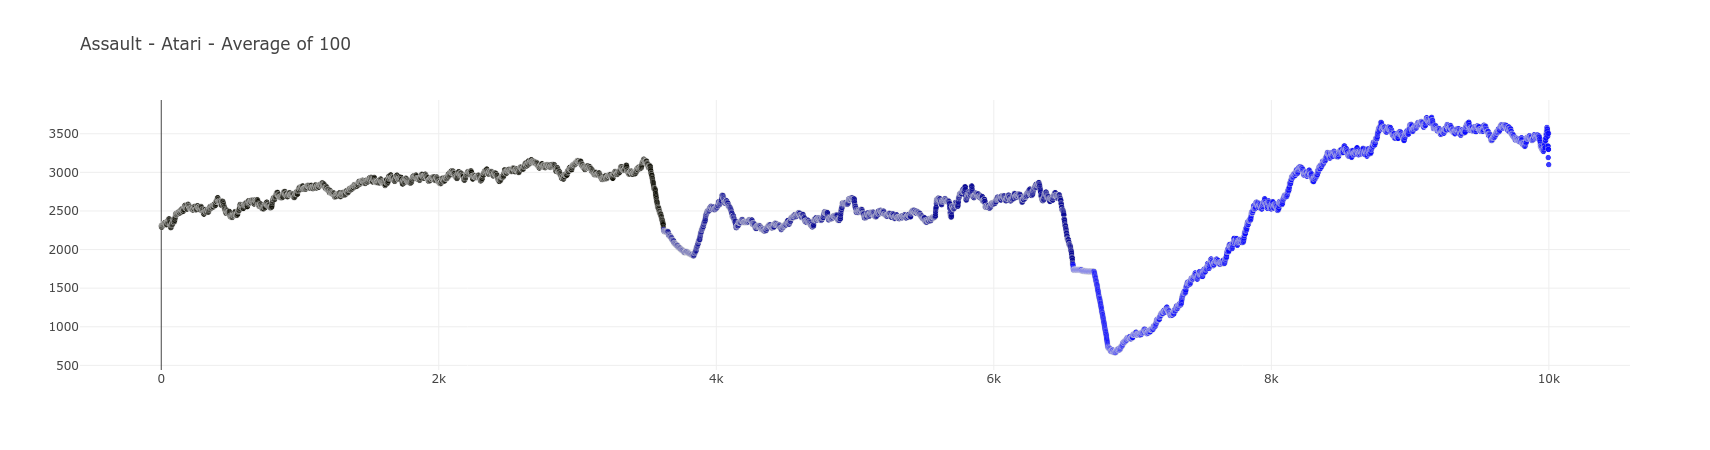

Done


In [131]:
plotAndSaveContinuousAverageOf(ctitle,title,100,blim,ulim,ctitle)

# Non-continuous average

In [132]:
def plotAndSaveAverageOf(customTitle,title,averageOf = 1,blim=None, ulim=None,customLabel = None, posx = 1, maxn = 1):
    for runtst in processed:
        dtframe = processed[runtst]
        label = runtst
        if customLabel is not None:
            label=customLabel
        color = groups[runtst]
        print("Processing: " + label)
        dataframe = pd.DataFrame(data=dtframe, columns=columnsofdt)
        scores = dataframe['SCORE']
        
        addToPlotAvgOfX(scores, averageOf, label, color, title=title)

    print("Done!")
    
    
def addToPlotAvgOfX(scores, avg, labelx, col, posx=1, maxpos=1, padding=0.3, title=""):
    y1 = calcAvgOfX(scores, avg)

    x = np.array([i for i in range(0, len(y1))])
    pospad = (1/maxpos)-padding/maxpos
    posit = (x-pospad)+(posx*pospad)
    xs = np.linspace(0, len(y1), len(y1))

    colors = ["rgba(10, 200, 10, 1)" for x in range(0,3620//avg)]
    colors.extend(["rgba(200, 200, 10, 1)" for x in range(3620//avg,6570//avg)])
    colors.extend(["rgba(200, 10, 10, 1)" for x in range(6570//avg,len(y1))])
    
    trace1 = go.Scattergl(
        x=posit,
        y=y1,
        mode='markers',
        marker=dict(
            size=6,
            color=colors,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                
                width=pospad
            ),
            opacity=0.8
        ),
        name=title
    )
    data = [trace1]
    layout = go.Layout(
        title=go.layout.Title(
        text=title+ (' - Average of ' + str(avg) if avg > 1 else ""),
        xref='paper',
        x=0
        ),
        xaxis = dict(
                         
                         title='Step'),
                    yaxis = dict(
                        
                        title='Score')
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename=title+' AvgOf' + str(avg)+'-'+str(random.randint(1,50000)))


Processing: Forgetting


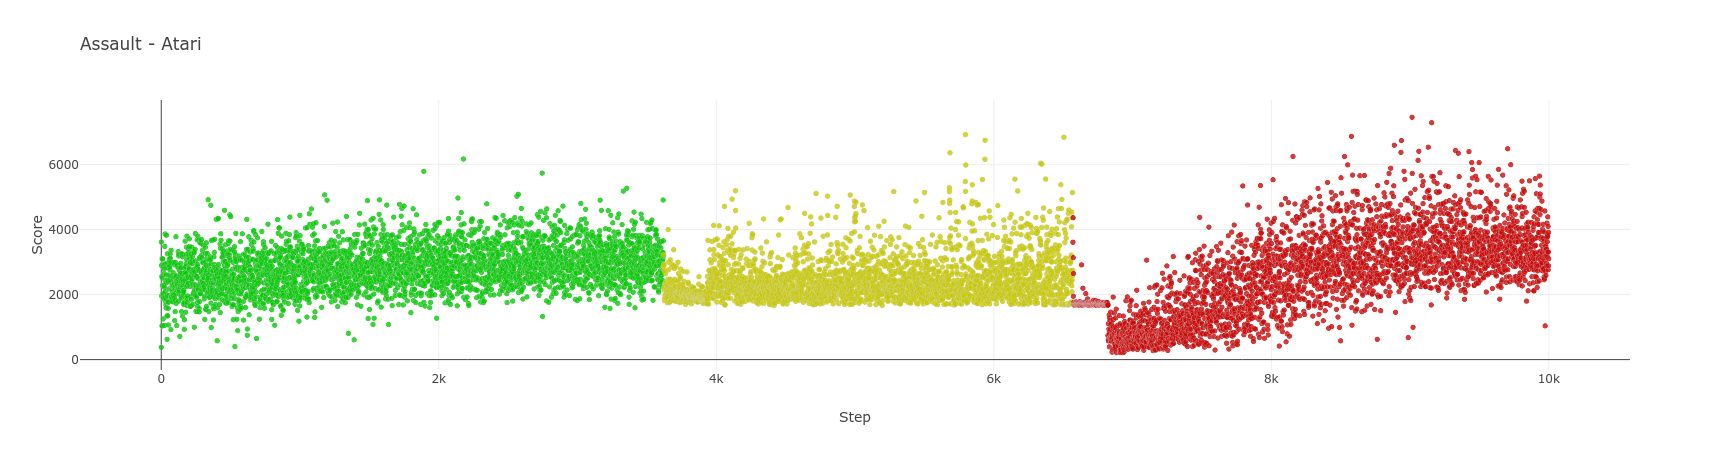

Done!


In [133]:
plotAndSaveAverageOf(ctitle,title,1,blim,ulim,ctitle)

Processing: Forgetting


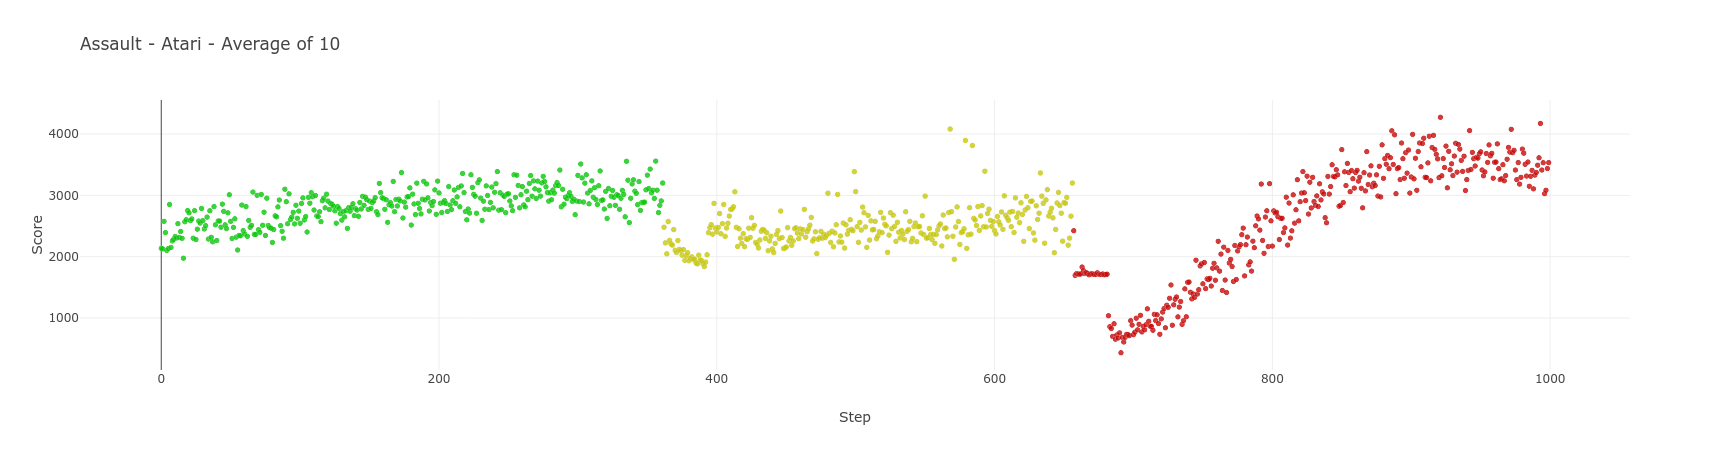

Done!


In [134]:
plotAndSaveAverageOf(ctitle,title,10,blim,ulim,ctitle)


Processing: Forgetting


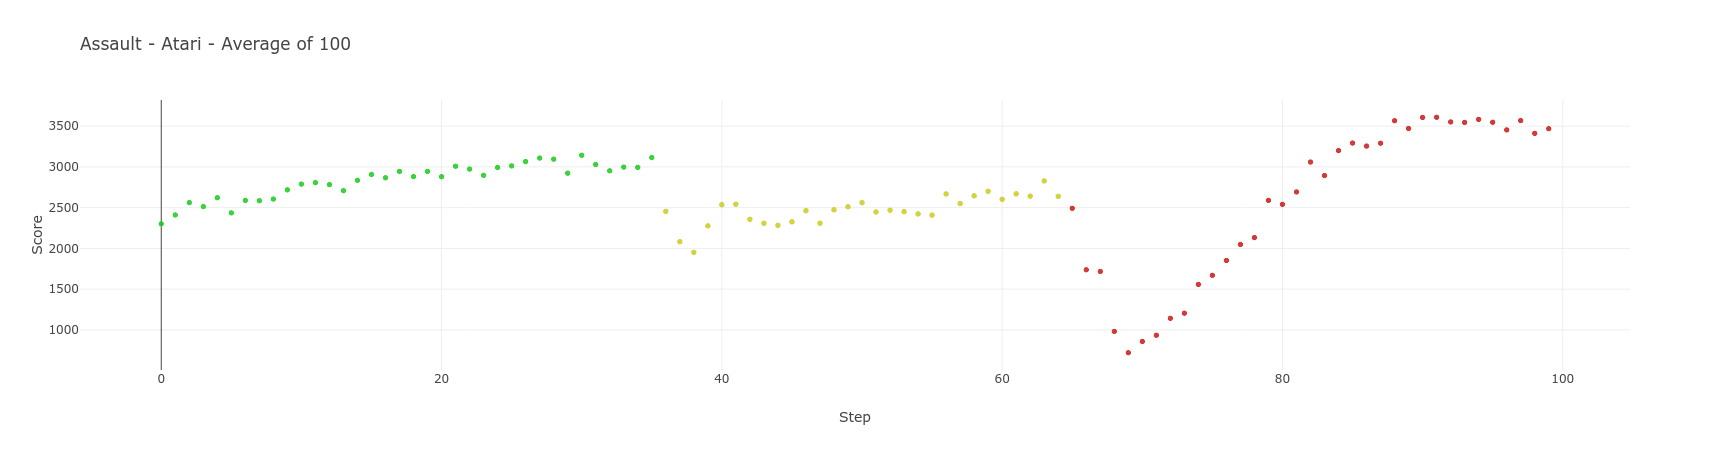

Done!


In [135]:
plotAndSaveAverageOf(ctitle,title,100,blim,ulim,ctitle)

# Progressive Difference

In [120]:
tickdistance = 200

def genDiffProg(scores_, avg, labelx, col, posx=1, maxpos=1, padding=0.3):
    scores = calcAvgOfX(scores_, avg)
    y1 = [0]
    for pos in range(0, len(scores)-1, 1):
        y1.append((scores[pos+1] - scores[pos]))
    return y1


def addToPlotDiffProg(scores_, avg, labelx, col, posx=1, maxpos=1, padding=0.3, title=""):
    y1 = genDiffProg(scores_,avg, labelx, col, posx, maxpos, padding)

    print(countPosNeg(y1))
    print(countWeightedPosNeg(y1))
    x = np.array([i for i in range(0, len(y1))])
    pospad = (1/maxpos)-padding/maxpos
    posit = (x-pospad)+(posx*pospad)
    maxy = np.max(np.abs(y1))
    print(["maxy", maxy])
    trace1 = go.Bar(
        x=posit,
        y=y1,
        marker=dict(
            line=dict(
                color='rgba(10, 10, 100, 1)',
                width=1
            ),
            opacity=1
        ),
        name=title
    )
    
    data = [trace1]
    layout = go.Layout(
        title=go.layout.Title(
        text=title+ (' - Average of ' + str(avg) if avg > 1 else ""),
        xref='paper',
        x=0
        ),
        margin=go.layout.Margin(
        l=50,
        r=20,
        b=50,
        t=50,
        pad=4),
        xaxis = dict(
                         
                         title='Step',mirror=True,
                        ticks='outside',
                        showline=True),
                    yaxis = dict(
                        mirror=True,
                        ticks='outside',
                        showline=True,
                        range=[maxy*-1-500, maxy+500],
                        nticks=int(np.ceil(maxy/tickdistance))*2+1,
                        title='Difference')
    
                        
                    
                  
    )
    """,
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                    """
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename=title+'DiffProg'+str(random.randint(1,50000)))


def plotAndSaveForwardDifference(customTitle,title,averageOf = 1,blim=None, ulim=None,customLabel = None, posx = 1, maxn = 1):
    for runtst in processed:
        dtframe = processed[runtst]
        label = runtst
        if customLabel is not None:
            label=customLabel
        color = groups[runtst]

        print("Processing: " + label)
        dataframe = pd.DataFrame(data=dtframe, columns=columnsofdt)
        scores = dataframe['SCORE']
        
        addToPlotDiffProg(scores, averageOf, label, color, posx, maxn, title=title)


    print("Done!")

Processing: Forgetting
[5031, 9, 4961]
[-3581962.0, 0.0, 3584684.0]
['maxy', 5139.0]


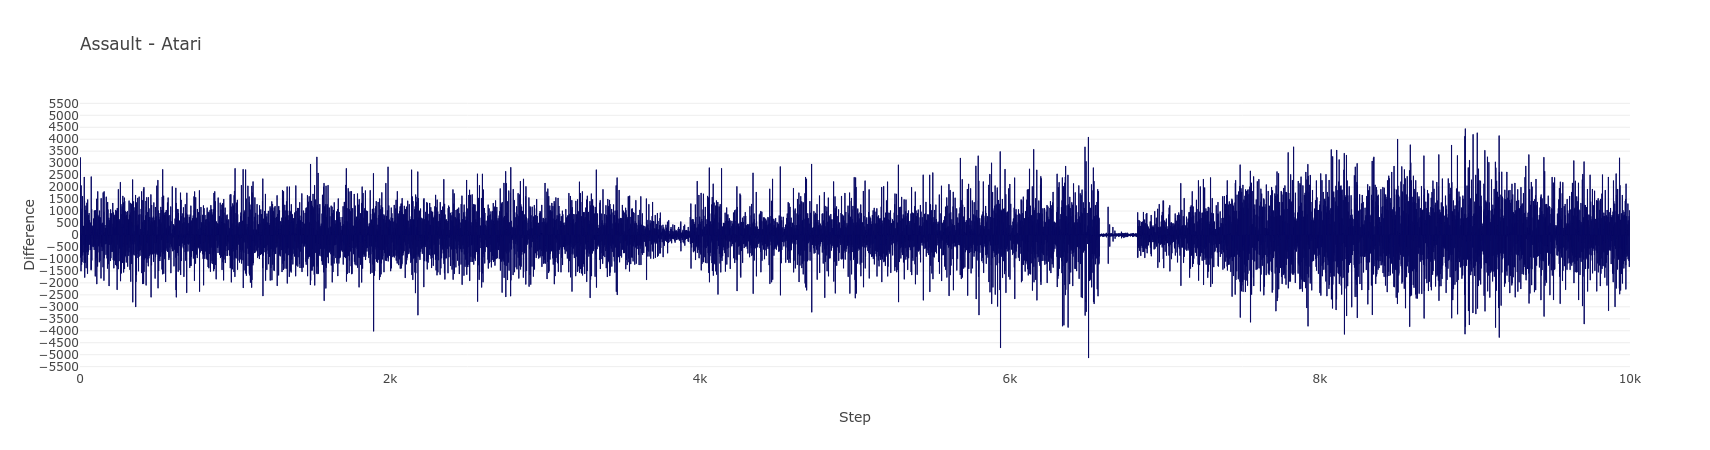

Done!


In [100]:
plotAndSaveForwardDifference(ctitle,title,1,blim,ulim,ctitle)


Processing: Forgetting
[494, 2, 505]
[-122152.19999999997, 0, 123549.69999999991]
['maxy', 1760.1]


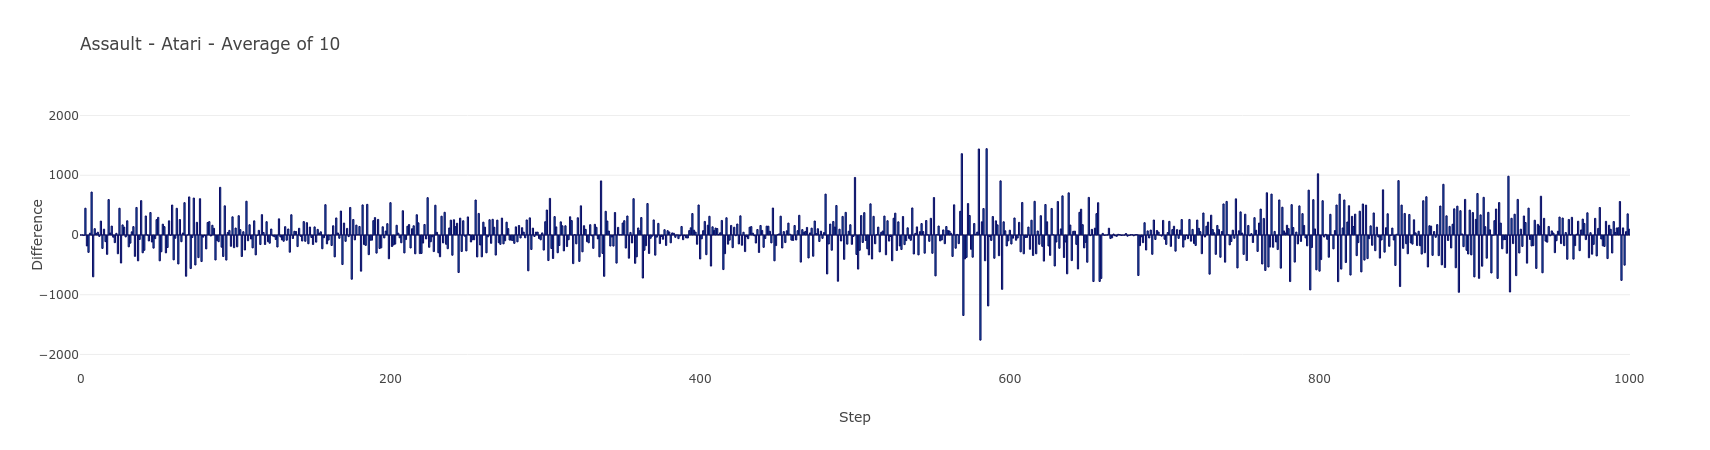

Done!


In [101]:
plotAndSaveForwardDifference(ctitle,title,10,blim,ulim,ctitle)


Processing: Forgetting
[44, 1, 55]
[-5800.869999999998, 0, 6967.749999999998]
['maxy', 754.7099999999998]


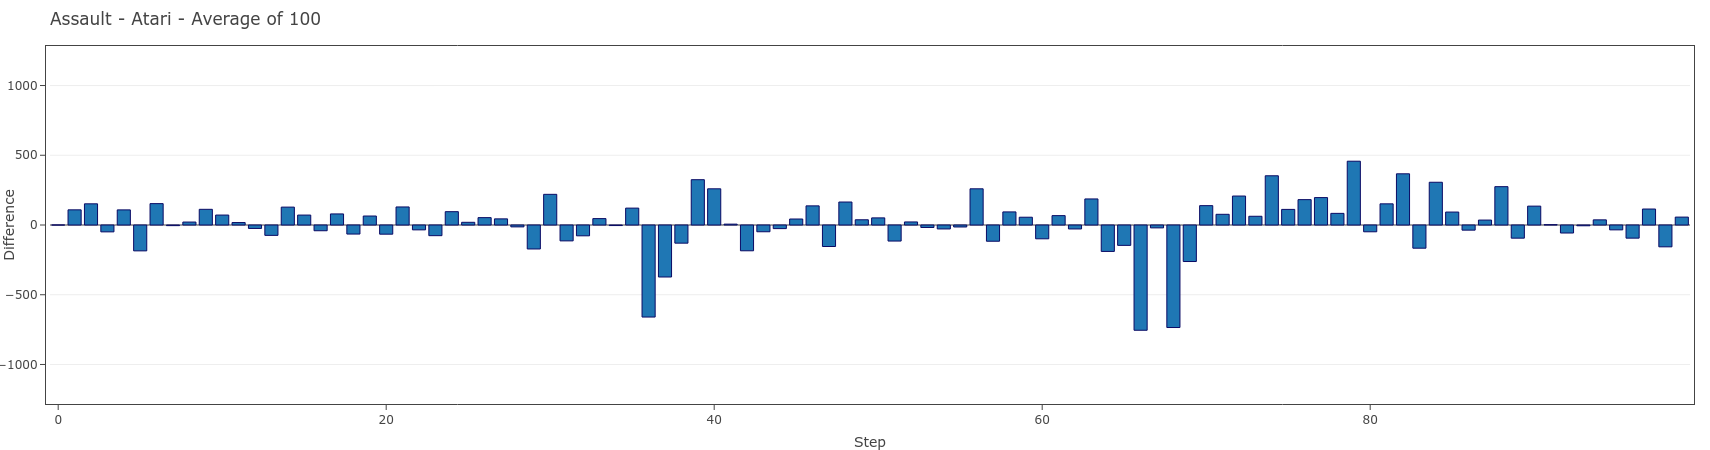

Done!


In [121]:
plotAndSaveForwardDifference(ctitle,title,100,blim,ulim,ctitle)

Processing: Forgetting
[4, 1, 5]
[-1517.7010000000005, 0, 2518.1740000000004]
['maxy', 1526.8580000000002]


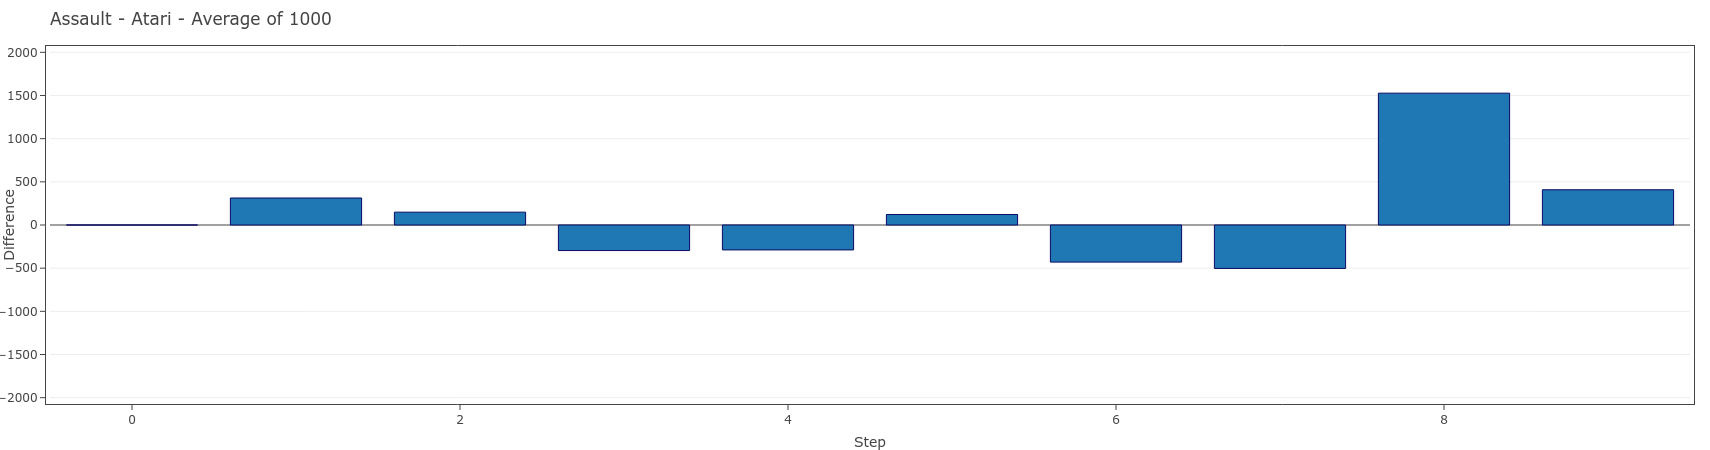

Done!


In [122]:
plotAndSaveForwardDifference(ctitle,title,1000,blim,ulim,ctitle)

# Average Hibrid

In [31]:
def addToPlotDiffAvgWProg(scores_, avg, labelx, col, posx=1, maxpos=1, padding=0.3, title=""):
    y1 = genDiffProg(scores_,avg, labelx, col, posx, maxpos, padding)
    scores = calcAvgOfX(scores_, avg)

    print(countPosNeg(y1))
    print(countWeightedPosNeg(y1))
    x = np.array([i for i in range(0, len(y1))])
    pospad = (1/maxpos)-padding/maxpos
    posit = (x-pospad)+(posx*pospad)

    print(len(y1))
    print(len(scores))
    print(len(posit))


    trace1 = go.Scatter3d(
        x=scores,
        y=y1,
        z=posit,
        mode='markers',
        marker=dict(
            size=6,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=pospad
            ),
            opacity=0.8
        ),
        name=title
    )
    data = [trace1]
    layout = go.Layout(
        title=go.layout.Title(
        text=title+' - Average of ' + str(avg),
        xref='paper',
        x=0
        ),
        scene = dict(
            
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",
                         title='Scores'),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",
                        title='Difference'),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",
                        title='Step'),)
                        
                    
                  
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename=title+'-avgOf' + str(avg)+'-'+str(random.randint(1,50000)))




def plotAndSaveHib(customTitle,title,averageOf = 1,blim=None, ulim=None,customLabel = None, posx = 1, maxn = 1):
    for runtst in processed:
        dtframe = processed[runtst]
        label = runtst
        if customLabel is not None:
            label=customLabel
        color = groups[runtst]

        print("Processing: " + label)
        dataframe = pd.DataFrame(data=dtframe, columns=columnsofdt)
        scores = dataframe['SCORE']

        addToPlotDiffAvgWProg(scores, averageOf, label, color, title=title)

    print("Done!")

Processing: Forgetting
[5031, 8, 4961]
[-3581962.0, 0.0, 3584684.0]
10000
10000
10000


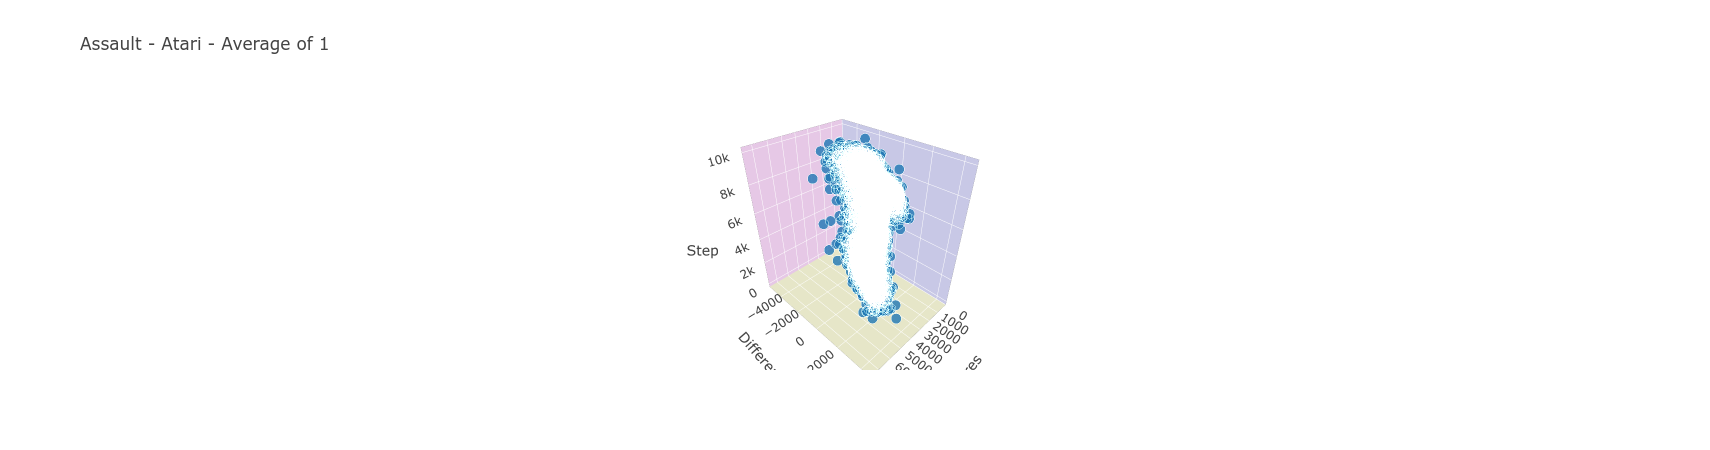

Done!


In [32]:
plotAndSaveHib(ctitle,title,1,blim,ulim,ctitle)

Processing: Forgetting
[494, 1, 505]
[-122152.19999999997, 0, 123549.69999999991]
1000
1000
1000


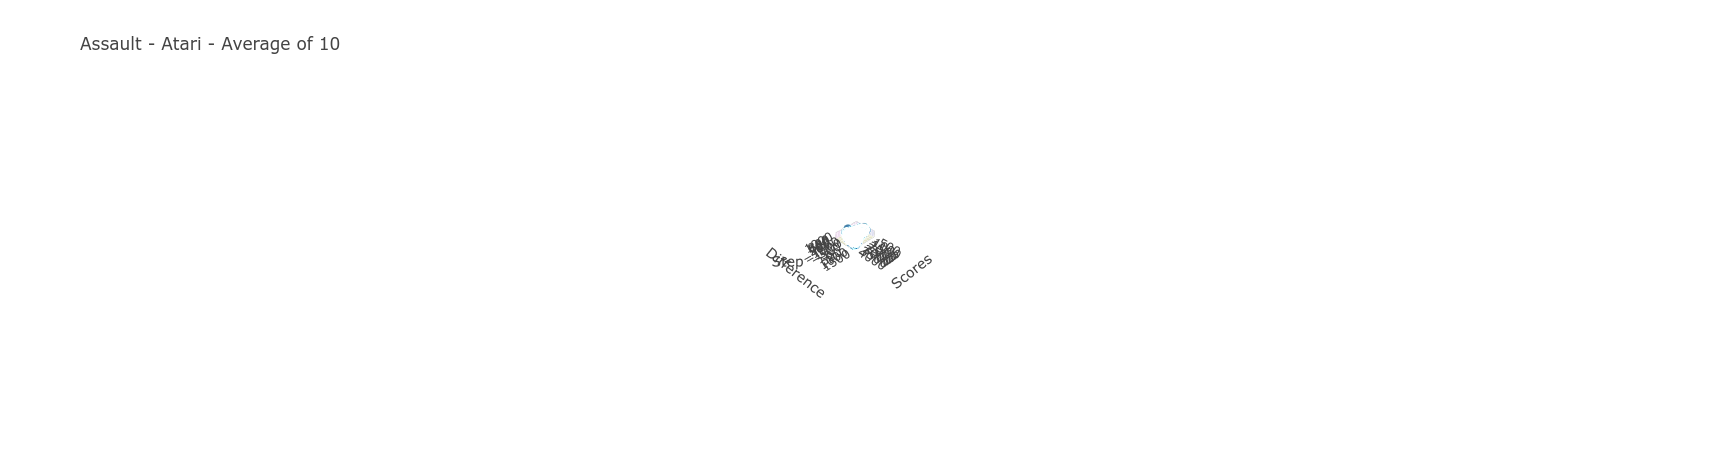

Done!


In [33]:
plotAndSaveHib(ctitle,title,10,blim,ulim,ctitle)

Processing: Forgetting
[44, 1, 55]
[-5800.869999999998, 0, 6967.749999999998]
100
100
100


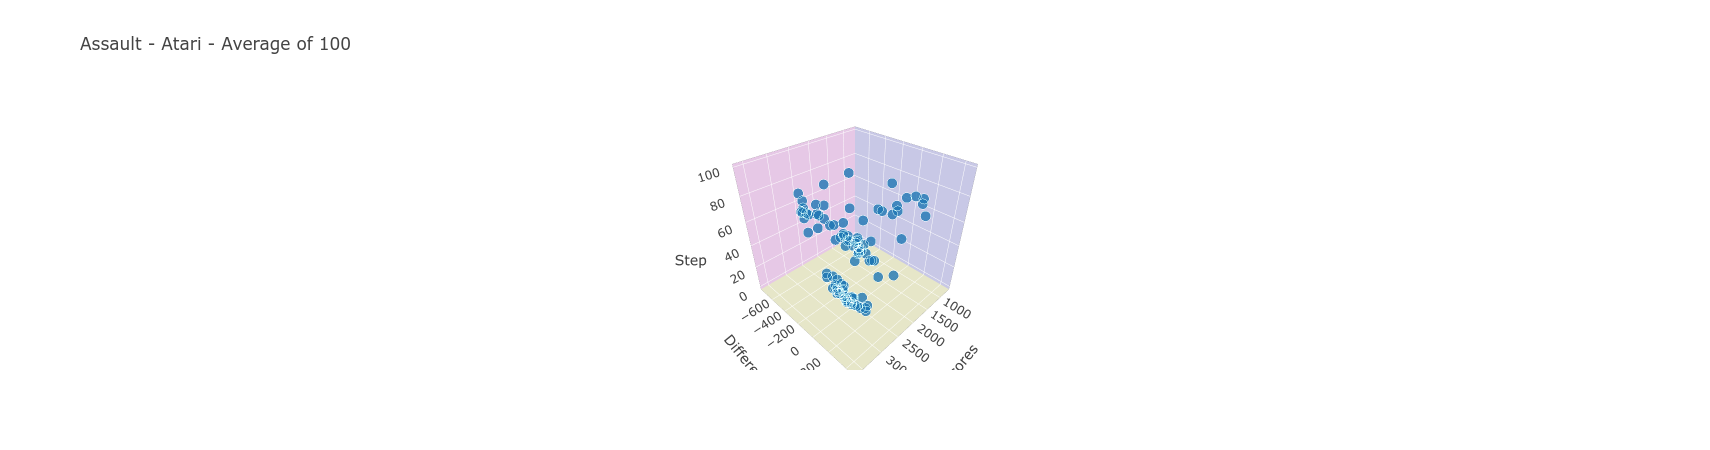

Done!


In [34]:
plotAndSaveHib(ctitle,title,100,blim,ulim,ctitle)

# Min Max

In [42]:
def addToPlotMinMax(scores_, avg, labelx, col, posx=1, maxpos=1, padding=0.3, title=""):

    y1 = []

    for pos in range(0, len(scores_), avg):
        y1.append((np.amax(scores_[pos:pos+avg]) - np.amin(scores_[pos:pos+avg]))/np.average(scores_[pos:pos+avg]))
    x = np.array([i for i in range(0, len(y1))])
    pospad = (1/maxpos)-padding/maxpos
    posit = (x-pospad)+(posx*pospad)
    colors = ["rgba(10, 200, 10, 1)" for x in range(0,3620//avg)]
    colors.extend(["rgba(200, 200, 10, 1)" for x in range(3620//avg,6570//avg)])
    colors.extend(["rgba(200, 10, 10, 1)" for x in range(6570//avg,len(y1))])

    print(len(y1))
    print(len(posit))
    trace1 = go.Scatter(
        x=posit,
        y=y1,
        mode='markers',
        marker=dict(
            size=6,
            color=colors,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                
                width=pospad
            ),
            opacity=0.8
        ),
        name=title
    )
    data = [trace1]
    layout = go.Layout(
        title=go.layout.Title(
        text=title+' - Average of ' + str(avg),
        xref='paper',
        x=0
        ),
        scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",
                         title='Scores'),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",
                        title='Difference'),)
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename=title+' MinMax' + str(avg)+'-'+str(random.randint(1,50000)))
    

def plotAndSaveAvgMinMaxOf(customTitle,title,averageOf = 1,blim=None, ulim=None,customLabel = None, posx = 1, maxn = 1):
    for runtst in processed:
        dtframe = processed[runtst]
        label = runtst
        if customLabel is not None:
            label=customLabel
        color = groups[runtst]

        print("Processing: " + label)
        dataframe = pd.DataFrame(data=dtframe, columns=columnsofdt)
        scores = dataframe['SCORE']

        addToPlotMinMax(scores, averageOf, label, color, title=title)

    print("Done!")

Processing: Forgetting
10000
10000


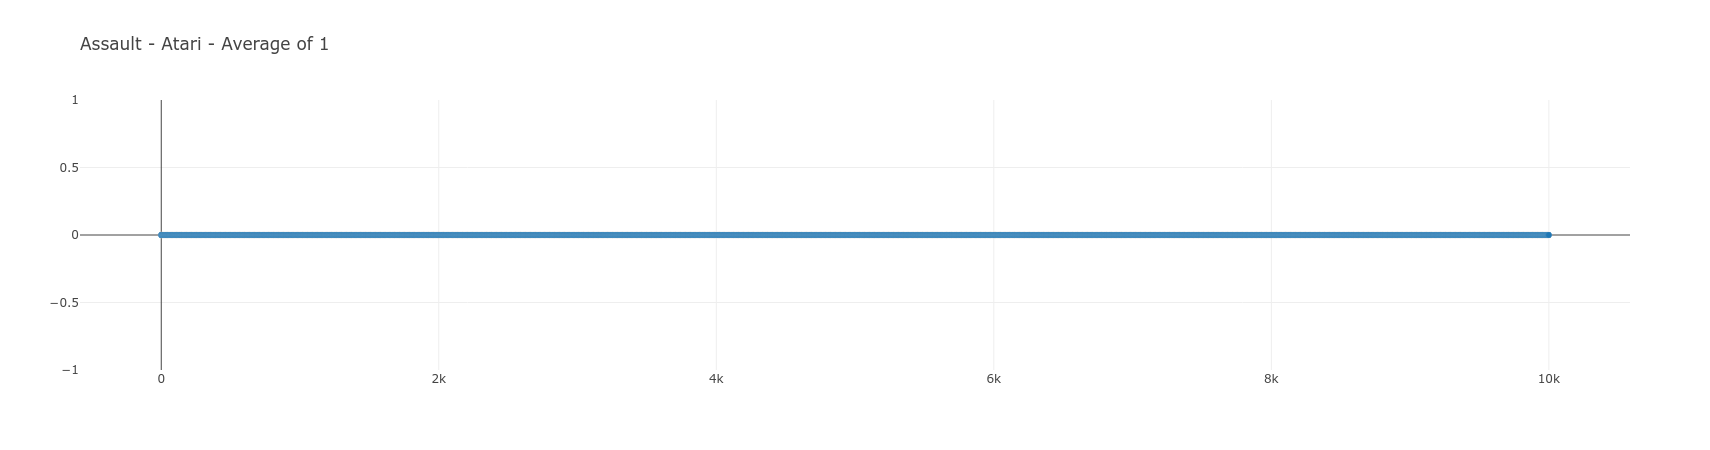

Done!


In [40]:
plotAndSaveAvgMinMaxOf(ctitle,title,1,blim,ulim,ctitle)

Processing: Forgetting
1000
1000


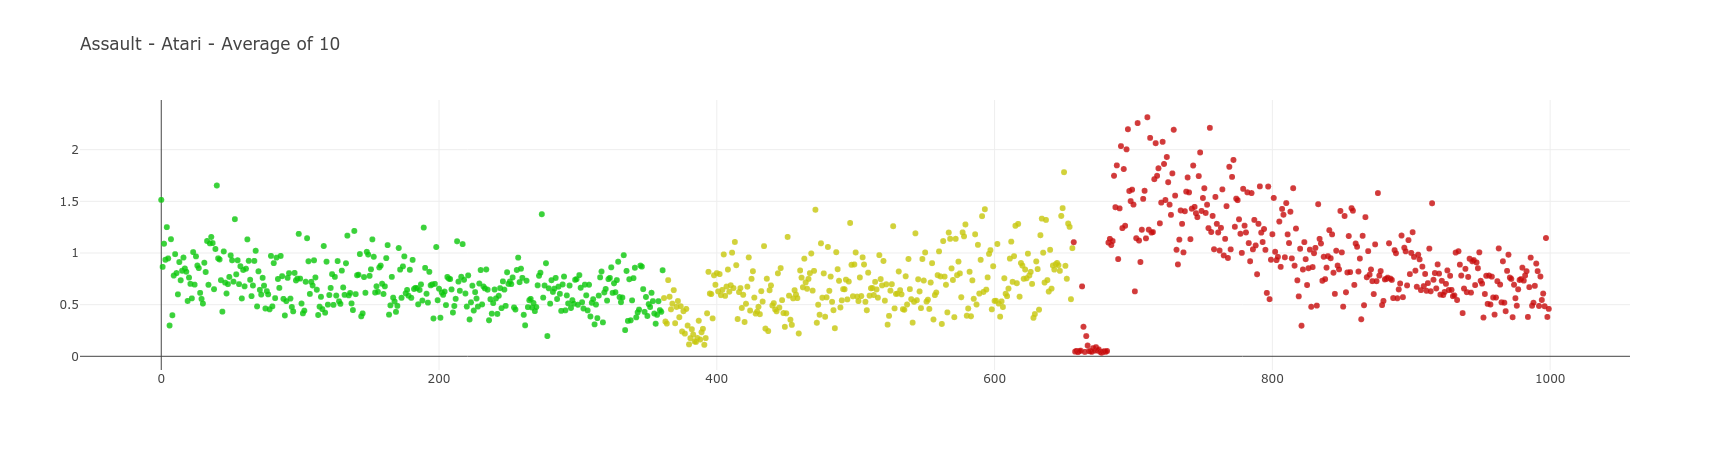

Done!


In [43]:
plotAndSaveAvgMinMaxOf(ctitle,title,10,blim,ulim,ctitle)

Processing: Forgetting
100
100


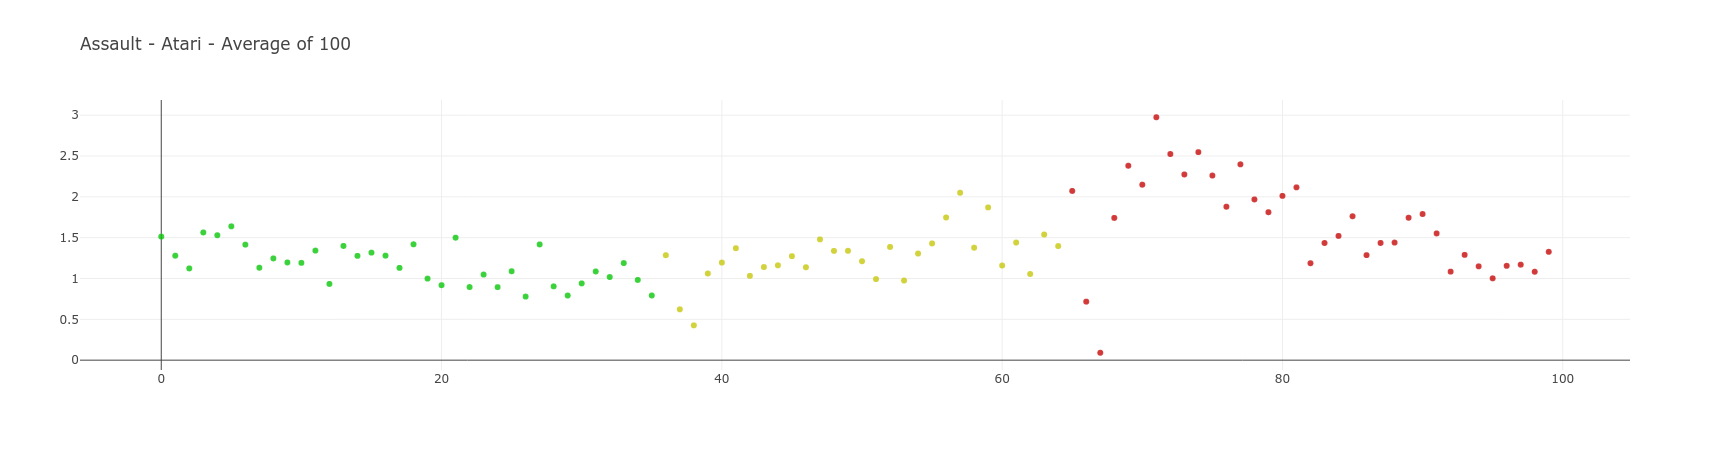

Done!


In [44]:
plotAndSaveAvgMinMaxOf(ctitle,title,100,blim,ulim,ctitle)